In [30]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../script')
from utils import Cleaner
from plots import *
from data_extraction import *

clean = Cleaner()


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
#lets start by importing the data
conn = connection()


In [5]:
data = table_to_sql(conn, "telecom_data")

c:\Users\ok\Desktop\10 Acadamy\week_1\week_1\notebook\../script\data_extraction.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,1970-01-01,4/25/2019 14:35,1970-01-01,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,1970-01-01,4/25/2019 8:15,1970-01-01,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1970-01-01,4/25/2019 11:58,1970-01-01,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,1970-01-01,4/25/2019 7:36,1970-01-01,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,1970-01-01,4/25/2019 10:40,1970-01-01,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  float64       
 1   Start                                     150001 non-null  object        
 2   Start ms                                  150001 non-null  datetime64[ns]
 3   End                                       150001 non-null  object        
 4   End ms                                    150001 non-null  datetime64[ns]
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

### Top 10 handset types

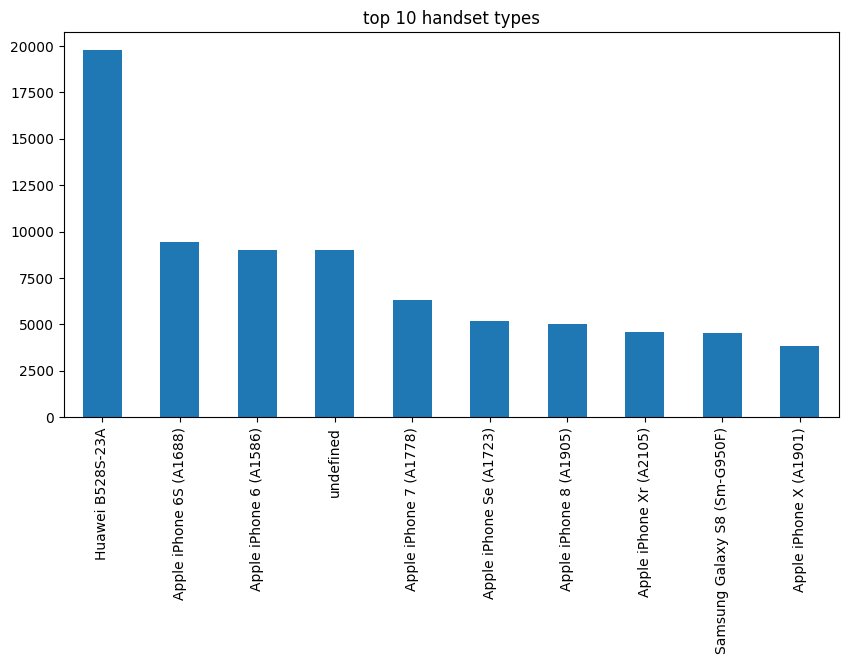

In [8]:
top_10 = data["Handset Type"].value_counts()[:10]
plt.figure(figsize= (10,5))
top_10.plot(kind="bar",title="top 10 handset types")
plt.show()

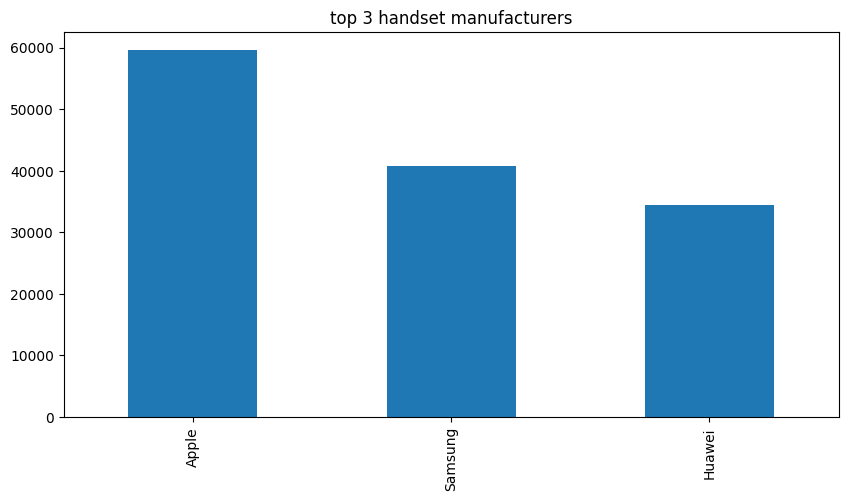

In [9]:
top_3 = data["Handset Manufacturer"].value_counts()[:3]
plt.figure(figsize=(10,5))
top_3.plot(kind="bar",title="top 3 handset manufacturers")
plt.show()

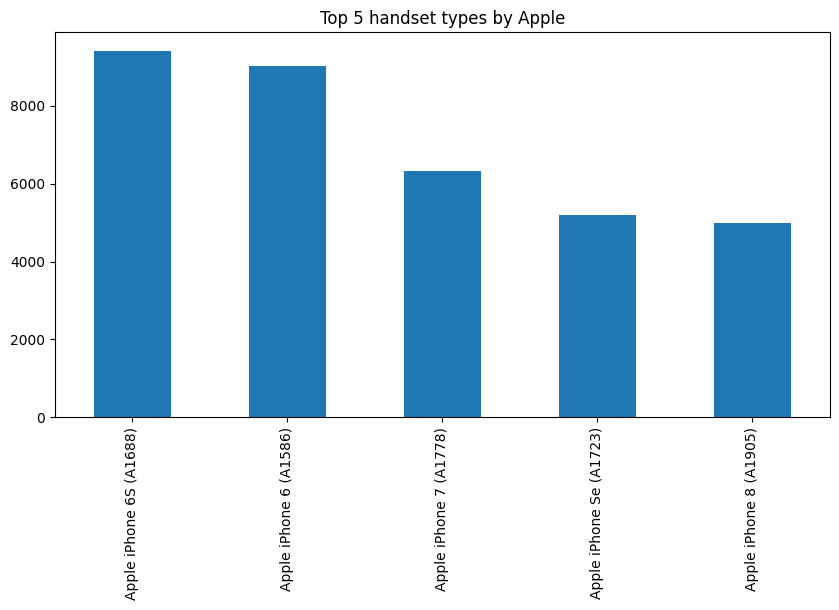

In [10]:
handsets_per_manufacturers=data[data["Handset Manufacturer"].str.contains("Apple|Samsung|Huawei") ][["Handset Manufacturer","Handset Type"]]
plt.figure(figsize=(10,5))
top_five_apple_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Apple')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Apple')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Apple")
plt.show()

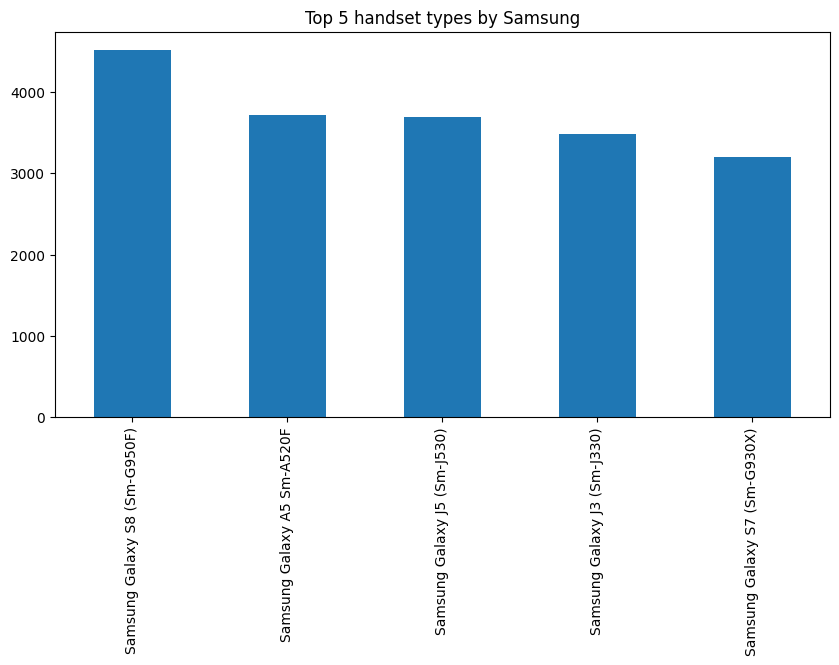

In [11]:
plt.figure(figsize=(10,5))
top_five_samsung_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Samsung')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Samsung')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Samsung")
plt.show()

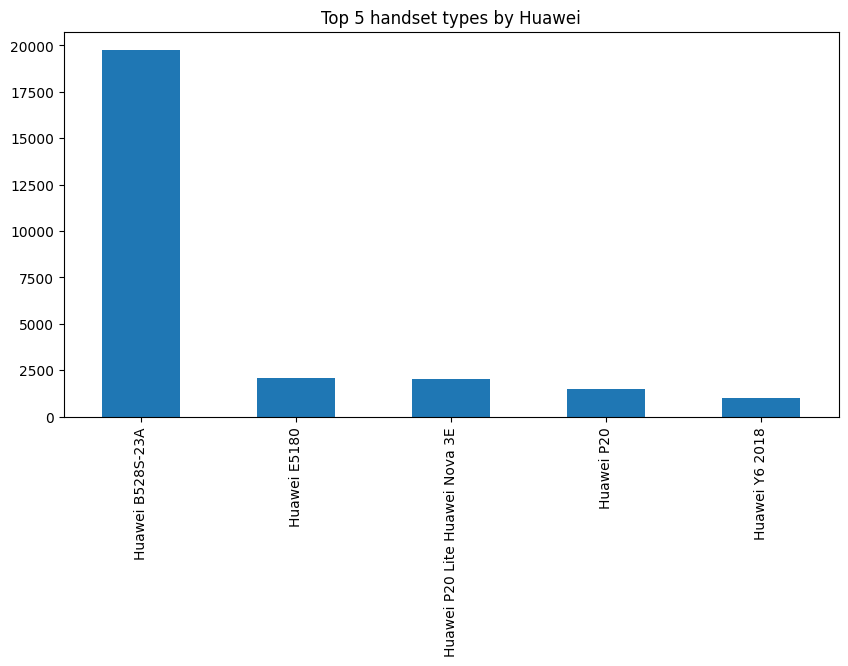

In [12]:
plt.figure(figsize=(10,5))
top_five_huawei_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Huawei')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Huawei')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Huawei")
plt.show()

## Short interpretation


Task 2.2  

In [15]:
session=data.groupby(["MSISDN/Number"]).agg({"Bearer Id":"count"})
session = session.rename(columns={"Bearer Id":"XDR_sessions"})
session = session.sort_values(by=["XDR_sessions"],ascending=False)

session.head(10)

,XDR_sessions
MSISDN/Number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360452e+10,12


In [16]:
#simmilatly we can find the duration of eash session, per user
duration = data.groupby(["MSISDN/Number"]).agg({"Dur. (ms)":"sum"})
duration.sort_values(by=["Dur. (ms)"],ascending=False,inplace=True)
duration=duration.rename(columns={"Dur. (ms)":"total_duration(ms) "})
duration.head(10)

,total_duration(ms)
MSISDN/Number,
3.366371e+10,72655568.0
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0


In [17]:
#to find the tootal Ul and Dl data per user, we can group by the msisdn/number and sum the total_ul and total_dl
total_data = data.groupby(["MSISDN/Number"]).agg({"Total UL (Bytes)":"sum","Total DL (Bytes)":"sum"})
total_data["total_data(bytes)"]=total_data["Total UL (Bytes)"]+total_data["Total DL (Bytes)"]
total_data.sort_values(by=["total_data(bytes)"],ascending=False,inplace=True)
total_data.head(10)


,Total UL (Bytes),Total DL (Bytes),total_data(bytes)
MSISDN/Number,,,
3.366371e+10,4.441826e+10,4.875453e+11,5.319636e+11
3.361489e+10,6.894830e+08,8.156743e+09,8.846226e+09
3.376054e+10,7.034786e+08,7.811295e+09,8.514774e+09
3.362578e+10,7.295774e+08,7.770043e+09,8.499621e+09
3.362632e+10,6.696507e+08,7.301517e+09,7.971167e+09
3.367588e+10,5.815688e+08,7.309542e+09,7.891111e+09
3.365973e+10,6.242603e+08,7.081602e+09,7.705863e+09
3.366646e+10,4.050610e+08,6.903440e+09,7.308501e+09
3.376041e+10,5.215189e+08,6.610852e+09,7.132371e+09


In [19]:
#it is better to sum the UL and DL volume of the applications per user, to get the total volume of data per user

data['social_media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['youtube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['netflix'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
data['gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['total_data'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']

In [20]:
app_total_data = data[['MSISDN/Number','social_media','google', 'email', 'youtube','netflix', 'gaming','other']].copy()
app_total_data.groupby('MSISDN/Number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,
3.362235e+10,917740.0,1778537.0,1155792.0,19720372.0,34305292.0,5.295803e+08,7.780348e+08
3.360110e+10,2336682.0,13695269.0,2169444.0,42838766.0,24060553.0,6.223093e+08,7.739113e+08
3.366435e+10,1551046.0,12691701.0,1794874.0,11487307.0,30238388.0,4.374410e+08,6.896980e+08
3.378103e+10,2837570.0,9041798.0,3407464.0,16655930.0,30368029.0,3.781730e+08,2.723188e+08
3.376132e+10,429296.0,1447346.0,2528221.0,33090313.0,26195079.0,7.765048e+08,7.744072e+08
3.366736e+10,2783717.0,10595491.0,3215798.0,37661432.0,24859303.0,3.502844e+08,2.489940e+08
3.366512e+10,249350.0,4116893.0,319370.0,12615054.0,25943478.0,2.384490e+08,1.044120e+08
3.365802e+10,3781065.0,18842879.0,4149815.0,82186647.0,71098738.0,2.075516e+09,1.650892e+09
3.364383e+10,2171411.0,13004682.0,2996877.0,22229220.0,20424679.0,4.751611e+08,2.989454e+08


Task 2.2


In [22]:
#Describe all  relevant variables. For the purpose of this analysis, we will focus on the following variables:
#MSISDN/Number, Dur. (ms), Total UL (Bytes), Total DL (Bytes), Social Media UL (Bytes), Social Media DL (Bytes), Google UL (Bytes), Google DL (Bytes), Email UL (Bytes), Email DL (Bytes), Youtube UL (Bytes), Youtube DL (Bytes), Netflix UL (Bytes), Netflix DL (Bytes), Gaming UL (Bytes), Gaming DL (Bytes), Other UL (Bytes), Other DL (Bytes).
#we can now merge all the dataframes to get the final dataframe

variables = data[['MSISDN/Number', 'Dur. (ms)', 'Total UL (Bytes)', 'total_data', 'Total DL (Bytes)', 'social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']].copy()
variables.groupby('MSISDN/Number').sum().sample(10)


,Dur. (ms),Total UL (Bytes),total_data,Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,,,,,
3.366903e+10,86399.0,40546058.0,3.922963e+08,3.517502e+08,1395533.0,9918277.0,1421006.0,18058161.0,29798928.0,3.156545e+08,2.926991e+08
3.365162e+10,73829.0,34789733.0,8.704906e+08,8.357008e+08,316190.0,13666528.0,2703026.0,20518500.0,19088543.0,8.067646e+08,4.025566e+07
3.366268e+10,139798.0,35285116.0,6.152854e+08,5.800002e+08,3522338.0,9452249.0,1333314.0,29134063.0,19010774.0,5.445095e+08,4.470103e+08
3.366025e+10,157617.0,77504676.0,1.095257e+09,1.017752e+09,3690917.0,11157613.0,1610503.0,59716732.0,50618976.0,9.521249e+08,3.048928e+08
3.369866e+10,430886.0,78853718.0,1.439895e+09,1.361041e+09,5978005.0,5877740.0,4719009.0,39342175.0,39702656.0,1.340700e+09,1.427330e+09
3.367599e+10,48034.0,82888829.0,1.493835e+09,1.410946e+09,5399374.0,12560818.0,3636771.0,47318796.0,53815578.0,1.359185e+09,8.118655e+08
3.376706e+10,35803.0,29612180.0,8.846167e+08,8.550045e+08,733708.0,10525174.0,3709451.0,18577610.0,28868410.0,8.197496e+08,3.962930e+07
3.366764e+10,403873.0,91973920.0,2.751138e+08,1.831399e+08,4269405.0,13153029.0,6376509.0,39246871.0,46906572.0,1.484275e+08,1.069855e+09
3.366270e+10,198721.0,150629640.0,9.170544e+08,7.664247e+08,3792780.0,17215890.0,8873289.0,74107009.0,70552079.0,7.225376e+08,1.380051e+09


In [28]:
#we can now conduct a non graphical univariate analysis on the variables
non_graphical_univariate = variables.drop('MSISDN/Number', axis=1).describe()
non_graphical_univariate.transpose()

,count,mean,std,min,25%,50%,75%,max
Dur. (ms),150001.0,1.046084e+05,8.103736e+04,7142.0,57442.0,86399.0,132430.0,1859336.0
Total UL (Bytes),150001.0,4.112121e+07,1.127635e+07,2866892.0,33222029.0,41143312.0,49034238.0,78331311.0
total_data,150001.0,4.957646e+08,2.443810e+08,28956107.0,284476442.0,496861209.0,706505411.0,955984776.0
Total DL (Bytes),150001.0,4.546434e+08,2.441421e+08,7114041.0,243107173.0,455841077.5,665705138.0,902969616.0
social_media,150001.0,1.828250e+06,1.035646e+06,1563.0,932218.0,1826471.0,2727487.0,3650861.0
google,150001.0,7.807295e+06,3.516420e+06,40330.0,4943599.0,7812835.0,10682796.0,15528782.0
email,150001.0,2.259102e+06,1.071109e+06,8359.0,1359344.0,2263567.0,3159818.0,4518036.0
youtube,150001.0,2.264348e+07,9.246800e+06,78903.0,15998463.0,22661770.0,29292604.0,45190078.0
netflix,150001.0,2.262861e+07,9.260820e+06,98432.0,15979455.0,22635545.0,29290445.0,45198153.0
gaming,150001.0,4.303331e+08,2.440199e+08,306358.0,218727939.0,431614977.0,641415878.0,859202784.0


In [ ]:
#we can now conduct a graphical univariate analysis on the variables


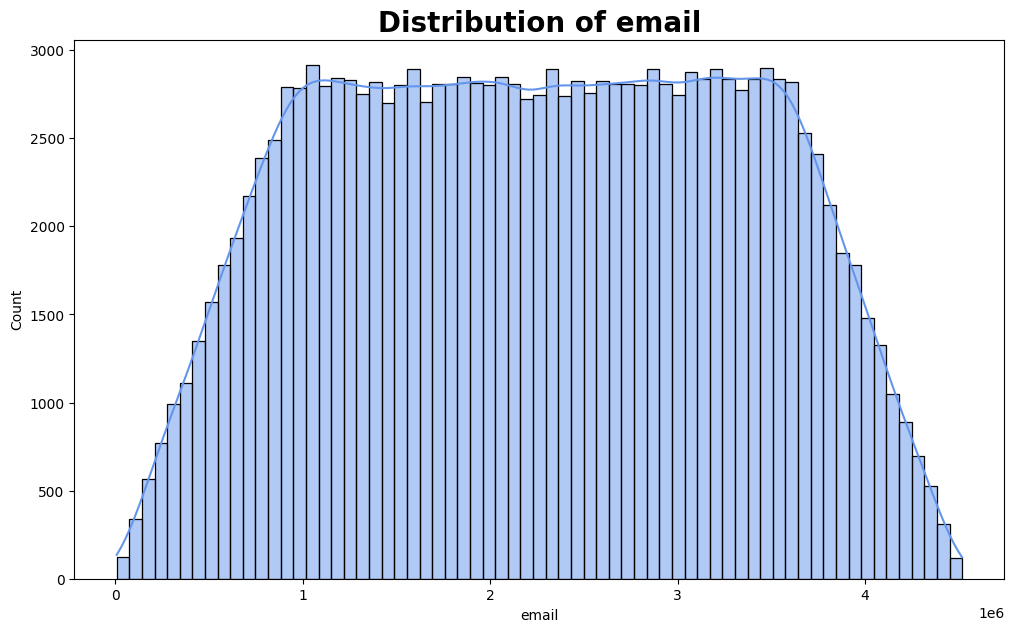

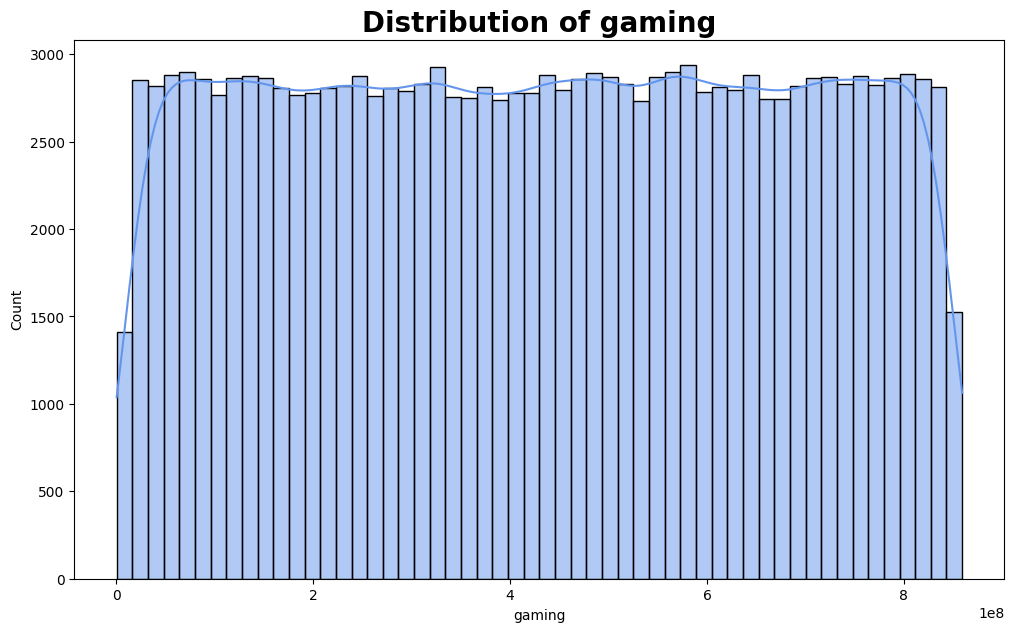

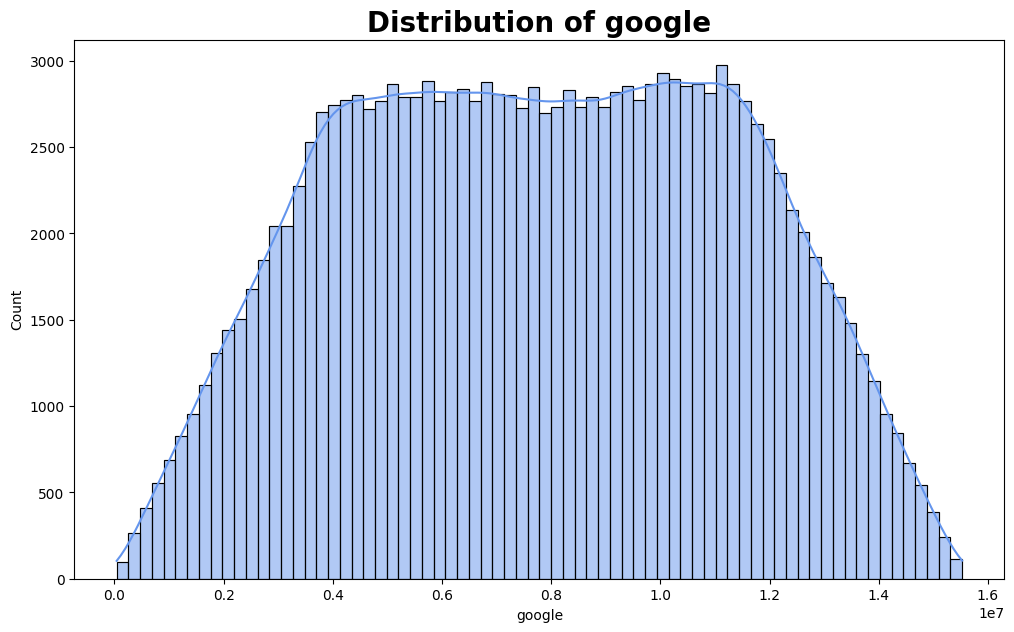

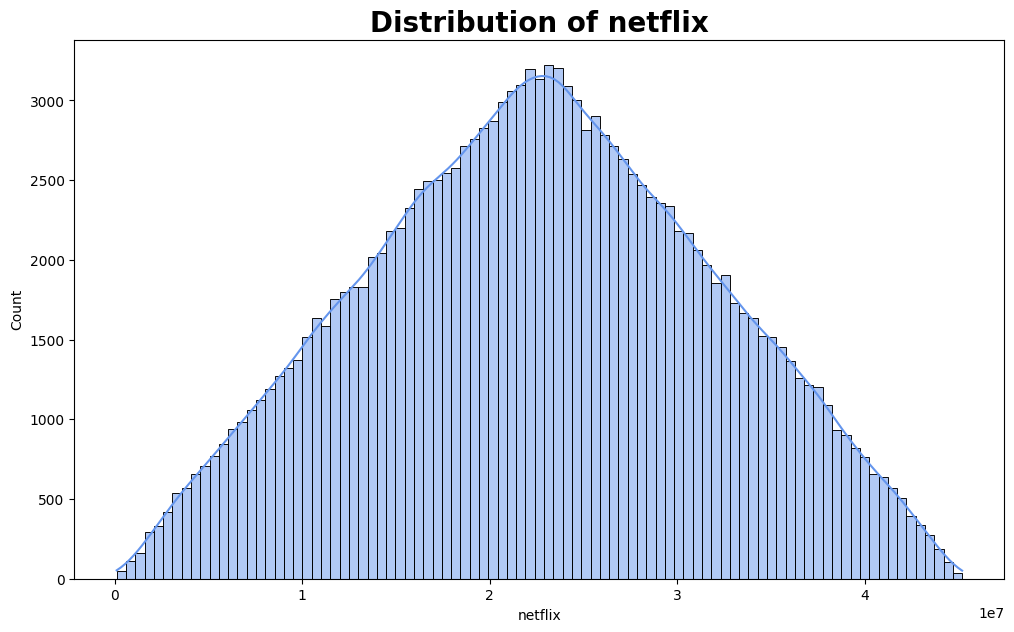

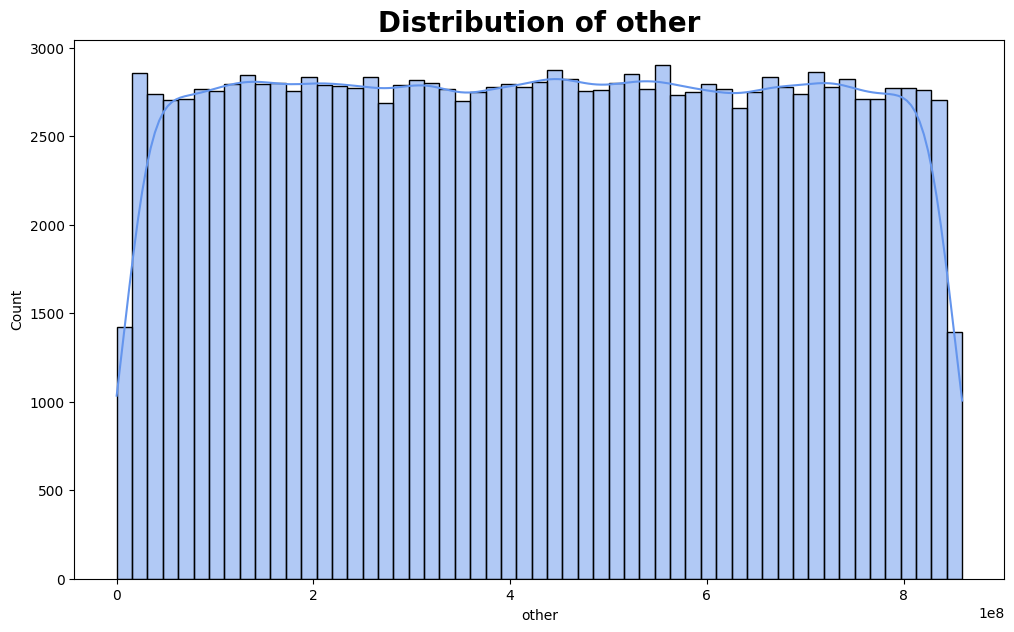

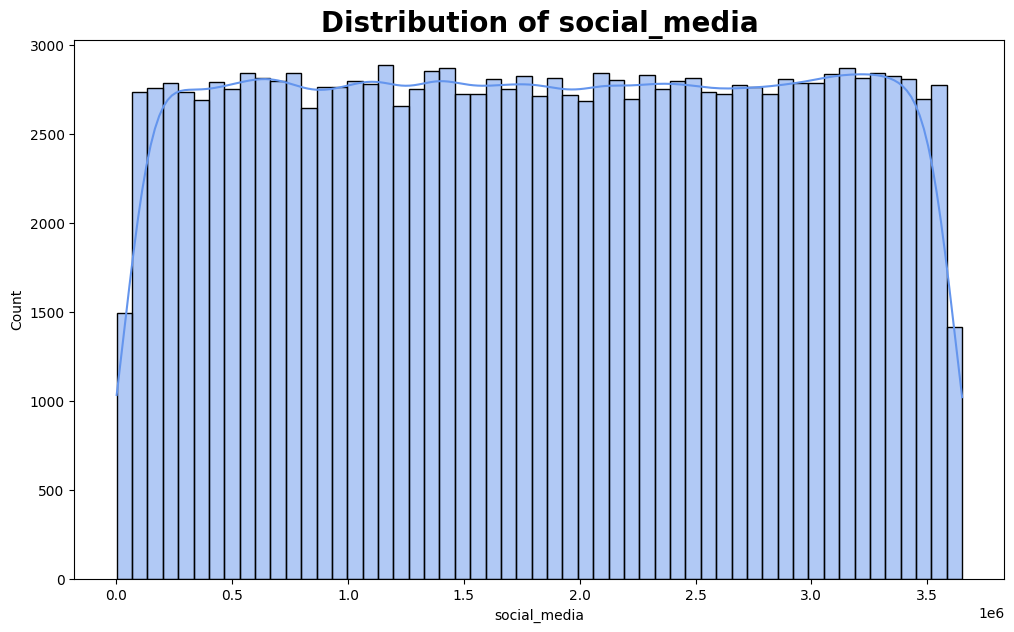

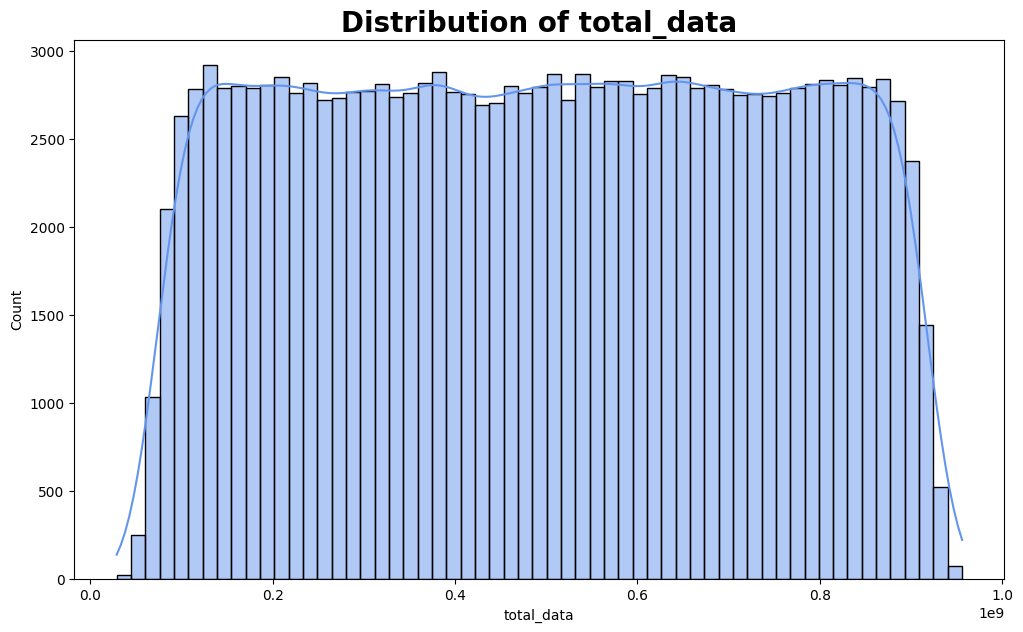

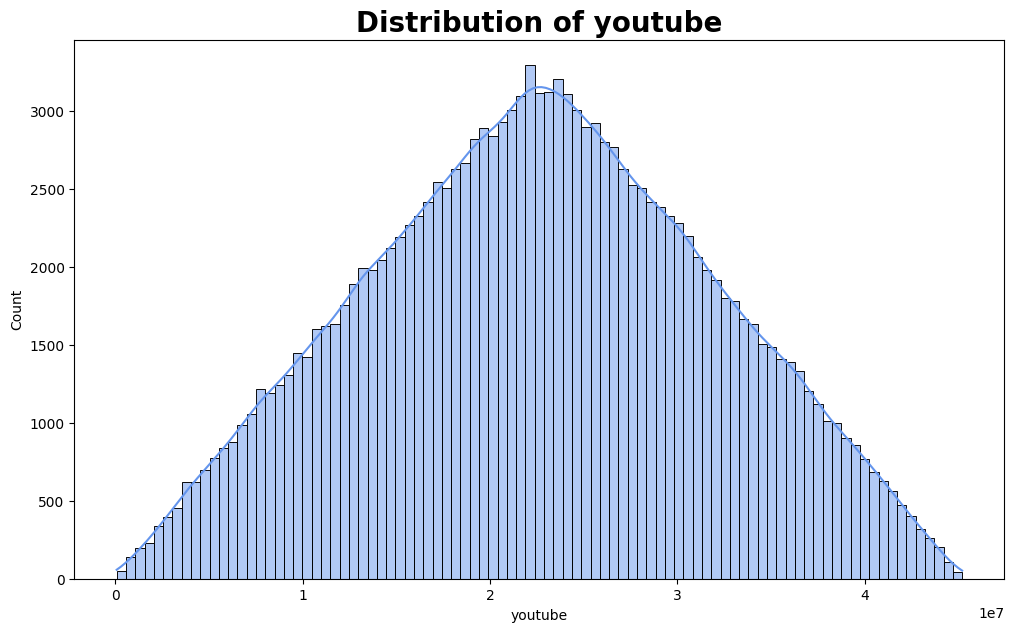

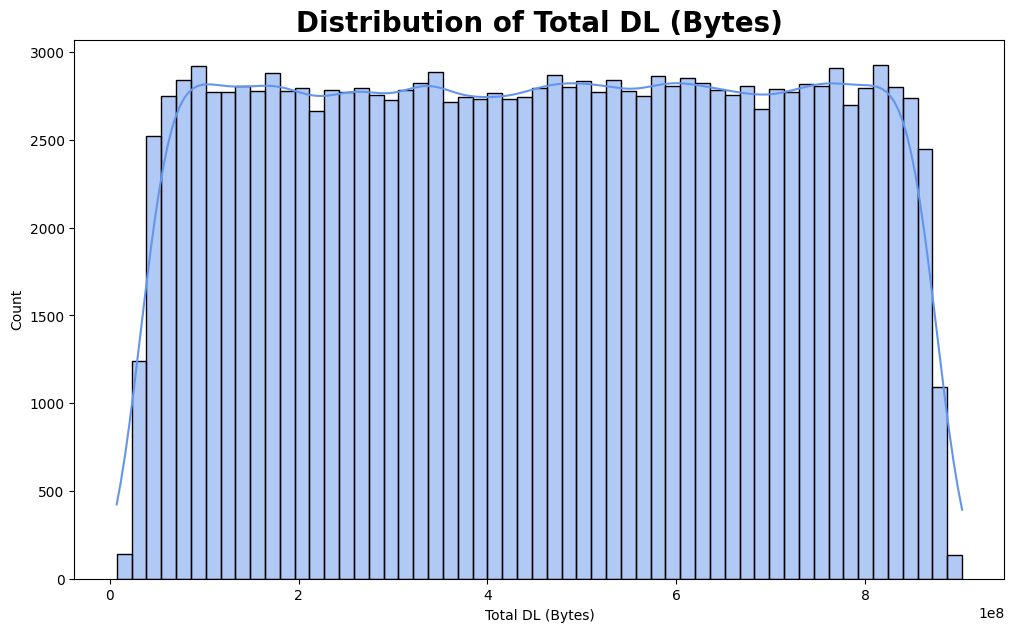

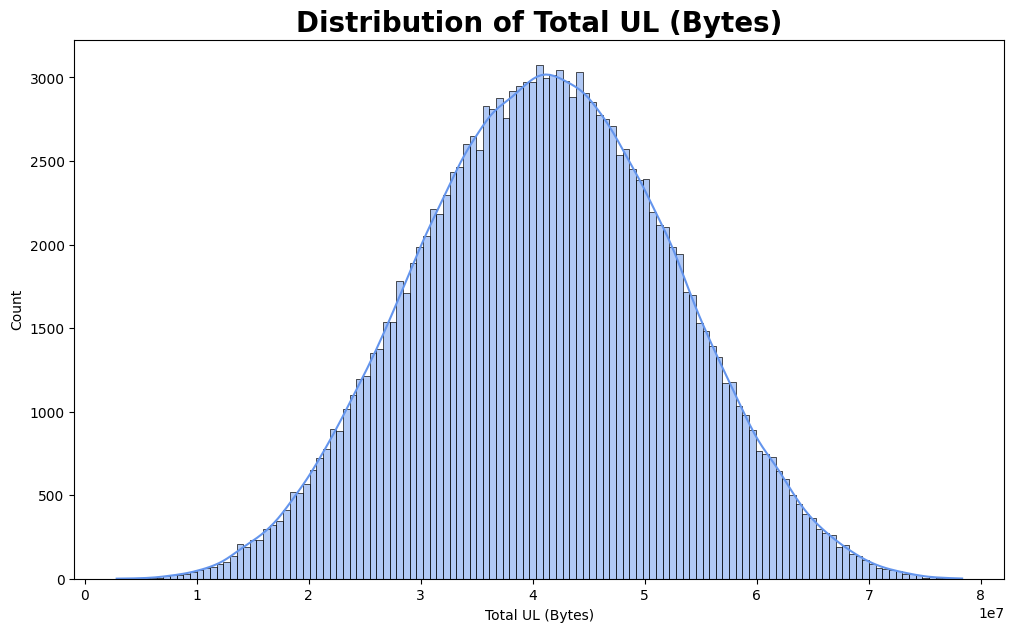

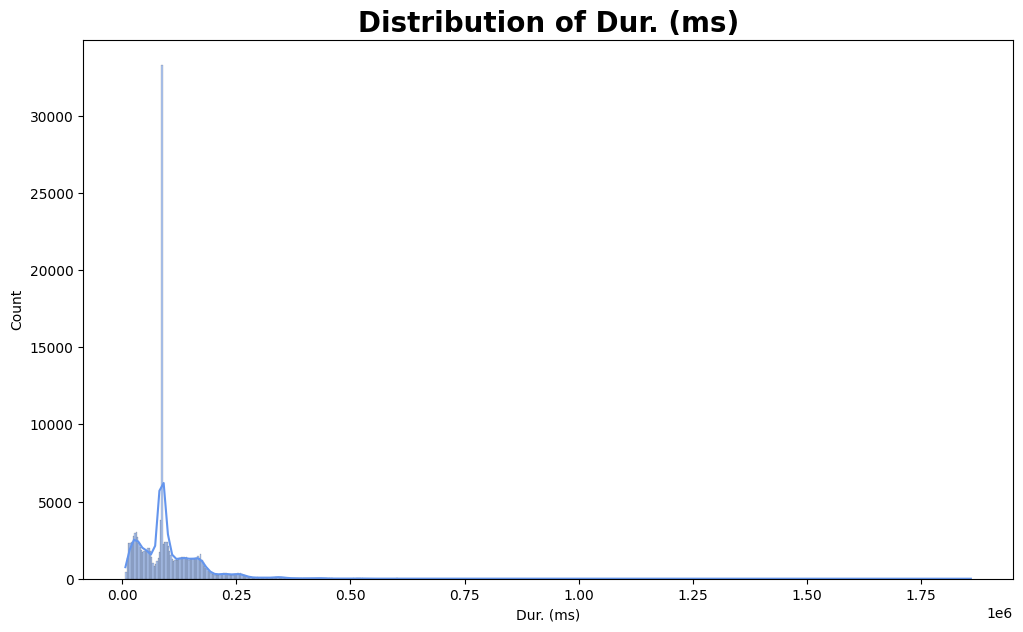

In [40]:
plot_hist(variables,'email','cornflowerblue')
plot_hist(variables,'gaming','cornflowerblue')
plot_hist(variables,'google','cornflowerblue')
plot_hist(variables,'netflix','cornflowerblue')
plot_hist(variables,'other','cornflowerblue')
plot_hist(variables,'social_media','cornflowerblue')
plot_hist(variables,'total_data','cornflowerblue')
plot_hist(variables,'youtube','cornflowerblue')
plot_hist(variables,'Total DL (Bytes)','cornflowerblue')
plot_hist(variables,'Total UL (Bytes)','cornflowerblue')
plot_hist(variables,'Dur. (ms)','cornflowerblue')


In [42]:
#Bi-variate analysis
agg_data = variables.groupby('MSISDN/Number').sum()
agg_data.head(10)

,Dur. (ms),Total UL (Bytes),total_data,Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,,,,,
3.360100e+10,116720.0,36053108.0,8.786906e+08,8.426375e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,3.865709e+08
3.360100e+10,181230.0,36104459.0,1.568596e+08,1.207552e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,2.817101e+08
3.360100e+10,134969.0,39306820.0,5.959665e+08,5.566597e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,5.016937e+08
3.360101e+10,49878.0,20327526.0,4.223207e+08,4.019932e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,3.527970e+07
3.360101e+10,37104.0,94280527.0,1.457411e+09,1.363130e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,8.048045e+08
3.360101e+10,253983.0,60009249.0,6.152172e+08,5.552080e+08,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,4.923728e+08
3.360101e+10,128360.0,101681858.0,6.547231e+08,5.530412e+08,2769627.0,10196403.0,1358959.0,26431335.0,45812397.0,5.484611e+08,2.248887e+08
3.360101e+10,86399.0,38575279.0,3.326604e+08,2.940851e+08,1782692.0,12023614.0,2215563.0,18892740.0,15292840.0,2.823644e+08,1.782015e+08
3.360101e+10,495702.0,93572016.0,9.901322e+08,8.965602e+08,5288685.0,14134211.0,4599825.0,63443802.0,54216117.0,8.330880e+08,1.041883e+09


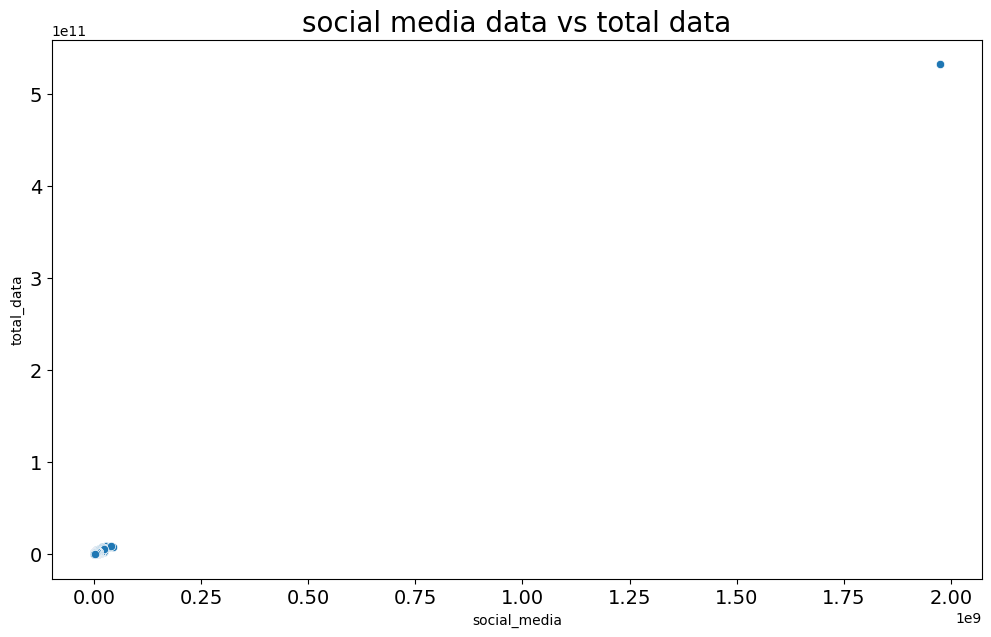

In [48]:
plot_scatter(agg_data, 'social_media', 'total_data', 'social media data vs total data',  None,  None)


C:\Users\ok\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


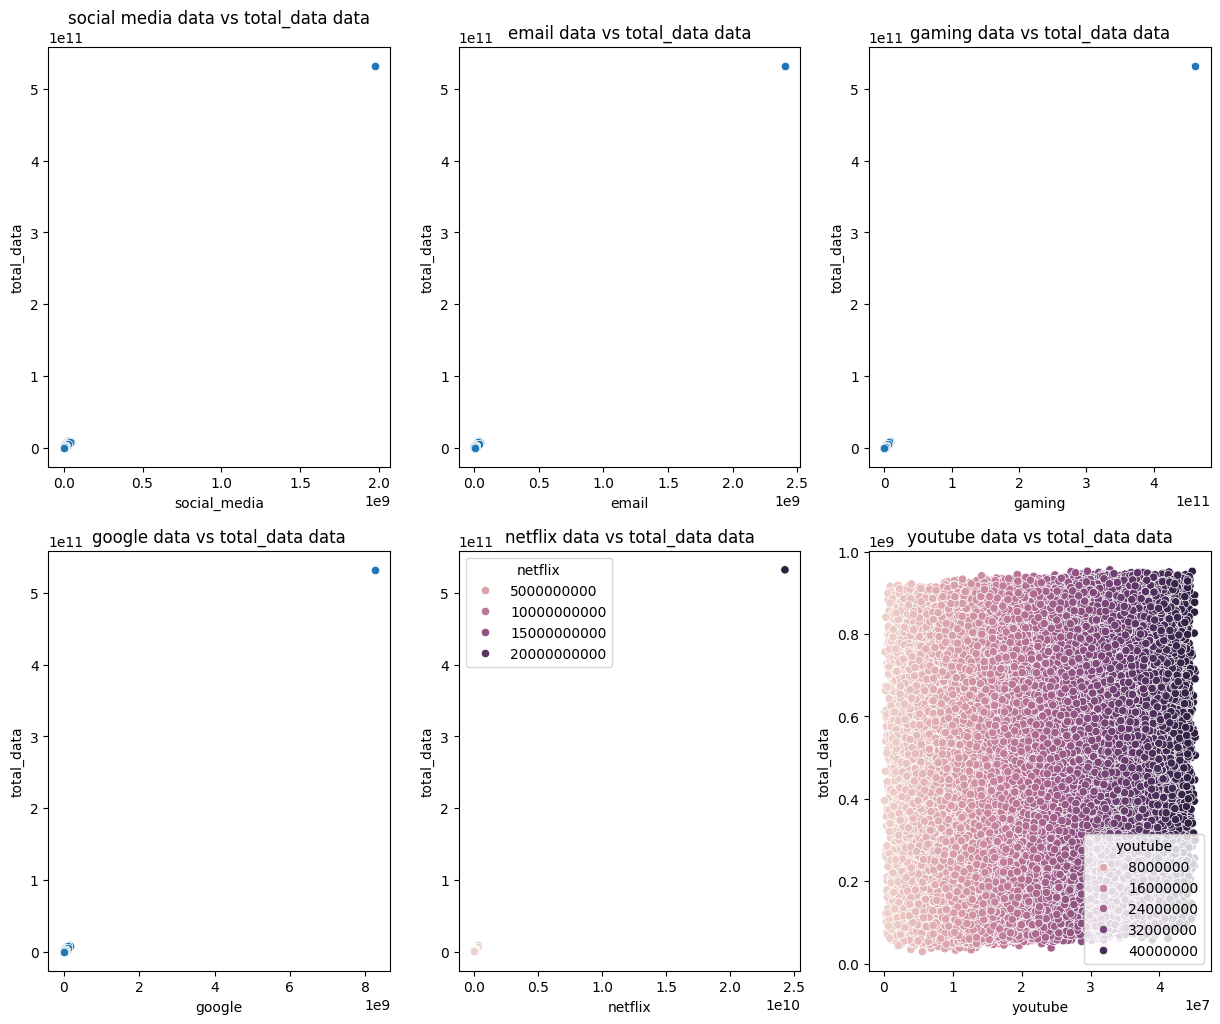

In [51]:
import seaborn as sns
plt.figure(figsize=(15,12))
plt.subplot(2,3,1,title="social media data vs total_data data")
sns.scatterplot(data=agg_data,x="social_media",y="total_data",hue=None,style=None)

plt.subplot(2,3,2,title="email data vs total_data data")
sns.scatterplot(data=agg_data,x="email",y="total_data",hue=None,style=None)

plt.subplot(2,3,3,title="gaming data vs total_data data")
sns.scatterplot(data=agg_data,x="gaming",y="total_data",hue=None,style=None)

plt.subplot(2,3,4,title="google data vs total_data data")
sns.scatterplot(data=agg_data,x="google",y="total_data",hue=None)

plt.subplot(2,3,5,title="netflix data vs total_data data")
sns.scatterplot(data=agg_data,x="netflix",y="total_data",hue="netflix")

plt.subplot(2,3,6,title="youtube data vs total_data data")
sns.scatterplot(data=variables,x="youtube",y="total_data",hue="youtube")

plt.show()

In [ ]:
#variable transformation
#we can now transform the variables to make them more normal


In [53]:
from sklearn.preprocessing import MinMaxScaler


scaled_explore_feature_df = variables[['MSISDN/Number', 'total_data', 'Dur. (ms)']]

scaled_explore_feature_df['Dur. (ms)'] = variables['Dur. (ms)'] /1000

scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'Dur. (ms)': 'duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('MSISDN/Number').agg({'duration':'sum', 'total_data': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('decile').agg({'total_data': 'sum',
                                                                                           'duration': 'sum'})
explore_feature_df_with_decile_agg

C:\Program Files\KMSpico\temp\ipykernel_20236\2691746819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_explore_feature_df['Dur. (ms)'] = variables['Dur. (ms)'] /1000


,total_data,duration
decile,,
1st_decile,1.154869e+13,644345.106
2nd_decile,1.257064e+13,1807896.025
3rd_decile,1.157014e+13,2124992.603
4th_decile,1.397433e+13,3448477.202
5th_decile,2.470139e+13,7665659.515


In [58]:
feature2 = variables.drop(['MSISDN/Number', 'Dur. (ms)'], axis=1)
feature2.corr(method='pearson')

,Total UL (Bytes),total_data,Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other
Total UL (Bytes),1.000000,0.044249,-0.001895,0.004794,0.033150,0.003360,0.386698,0.385298,0.006368,0.006263
total_data,0.044249,1.000000,0.998935,0.005383,0.013370,0.003768,0.034888,0.034798,0.998254,-0.002443
Total DL (Bytes),-0.001895,0.998935,1.000000,0.005167,0.011852,0.003616,0.017061,0.017036,0.998937,-0.002735
social_media,0.004794,0.005383,0.005167,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
google,0.033150,0.013370,0.011852,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
email,0.003360,0.003768,0.003616,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
youtube,0.386698,0.034888,0.017061,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
netflix,0.385298,0.034798,0.017036,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
gaming,0.006368,0.998254,0.998937,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
other,0.006263,-0.002443,-0.002735,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


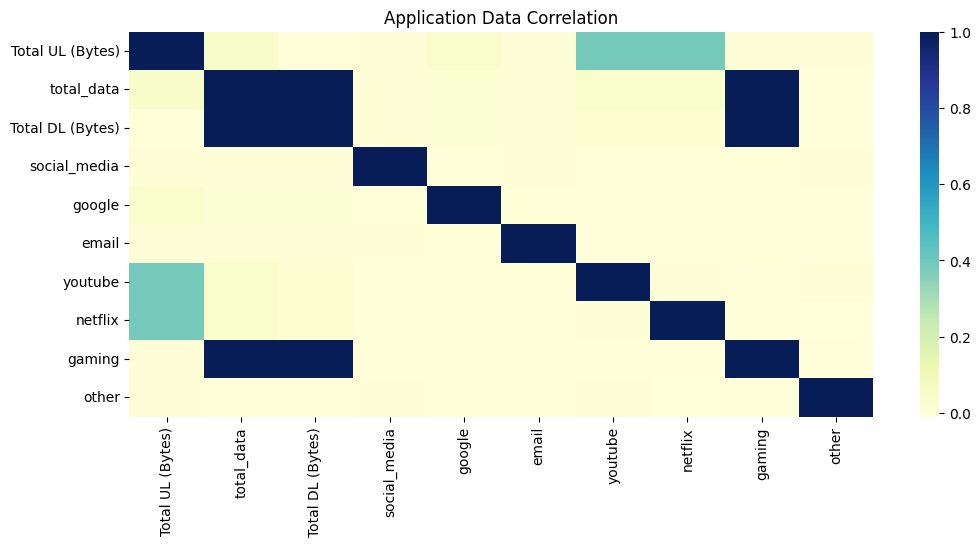

In [59]:
plt.figure(figsize=(12,5))
sns.heatmap(feature2.corr(),cmap="YlGnBu")
plt.title("Application Data Correlation")
plt.show()

In [61]:
data_reduction = variables.drop(['MSISDN/Number', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)'], axis=1)
data_reduction.head()

,total_data,social_media,google,email,youtube,netflix,gaming,other
0,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


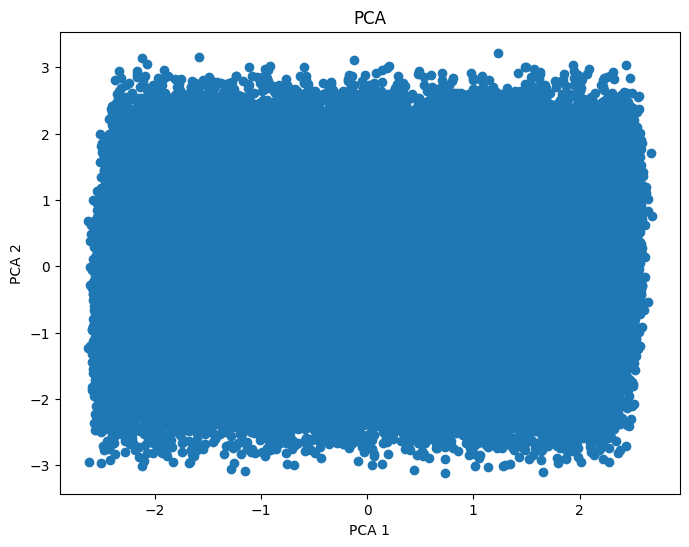

In [62]:
#we can now conduct a multivariate analysis on the variables
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# perform standardization by centering and scaling on cleaned_df
scaler = StandardScaler()
scaled_explore_feature_df = scaler.fit_transform(data_reduction)

# perform PCA on scaled_explore_feature_df
pca = PCA(n_components=2)
pca.fit(scaled_explore_feature_df)
pca_df = pd.DataFrame(pca.transform(scaled_explore_feature_df))

# plot the PCA_df
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[0], pca_df[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')
plt.show()

In [63]:
pca_df.head()

,0,1
0,0.862274,-0.506740
1,-1.191511,-0.225543
2,1.084460,-0.157891
3,-2.253890,1.069488
4,-0.625292,0.463931


In [43]:
%reload_ext autoreload
%autoreload 2